<a href="https://colab.research.google.com/github/YogiJungHoonYeon/Artificial-Intelligence-Lang/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib 3D


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets



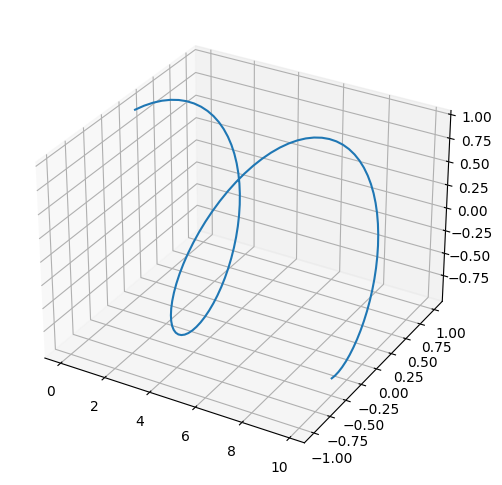

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0,10,0.1)
y = np.sin(x)
z = np.cos(x)

ax.plot(x,y,z)

# Dataset

In [ ]:
Dataset = datasets.load_diabetes(return_X_y=True)
Dataset = Dataset[0]

In [ ]:
print(len(Dataset[1]))
print(Dataset.shape) #shape=(442,10)



10
(442, 10)


In [ ]:
import pandas as pd
DataFrame = pd.DataFrame(Dataset)
print(type(DataFrame))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#to make file to csv, file needs to be Dataframe or pandas

DataFrame.to_csv('/content/sample_data/pca_data.csv',index=True) #index to save 1 columnn and 1 row vectors

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
Dataset_as_frame = datasets.load_diabetes(return_X_y=True, as_frame = True)
Dataset_as_frame = Dataset_as_frame[0]
print(Dataset_as_frame.shape)
DataFrame_as_frame = pd.DataFrame(Dataset_as_frame)
print(type(DataFrame_as_frame))

DataFrame_as_frame.to_csv('/content/sample_data/pca_data_as_frame.csv', index=True)


(442, 10)
<class 'pandas.core.frame.DataFrame'>


# PCA

In [ ]:
print("DataSet's Shape",Dataset.shape) #10 - dim

# i = row , d1 = (442,1), d1 - mean(all column)




def Cov(Dataset):
  row = Dataset.shape[0]
  column = Dataset.shape[1]

  weight = 0
  for k in range(row):
    weight = weight + Dataset[k]
    mean = weight /row

  for i in range(row):

    Dataset[i] = Dataset[i] - mean

  Rd = np.zeros((10,10))

  Dataset = Dataset.T

  for i in range(Rd.shape[0]):
    for j in range(Rd.shape[1]):
      Rd[i][j] = np.dot(Dataset[i], Dataset[j]) / row
  return Rd





Rd = Cov(Dataset)


def Identiy_Matrix(Rd):
  rank = Rd.shape[1]
  Id = np.zeros((rank,rank))
  for i in range(rank):
    for j in range(rank):
      if i==j:
        Id[i][j] = 1
      else:
        pass
  return Id

Id = Identiy_Matrix(Rd)


def eigen_value(Rd,Id,maximum_lamda, step):
  eigen_value_list = []
  i =0
  while i<= maximum_lamda:
    if np.linalg.det(Rd - (Id * i)) == 0:
      eigen_value_list.append(i)
      i = i + step
    else:
      i = i + step
  return eigen_value_list


eigen_value_list = eigen_value(Rd,Id,1,0.00001)
print(eigen_value_list)








DataSet's Shape (442, 10)
[]


# Datasets Scattered in 3D

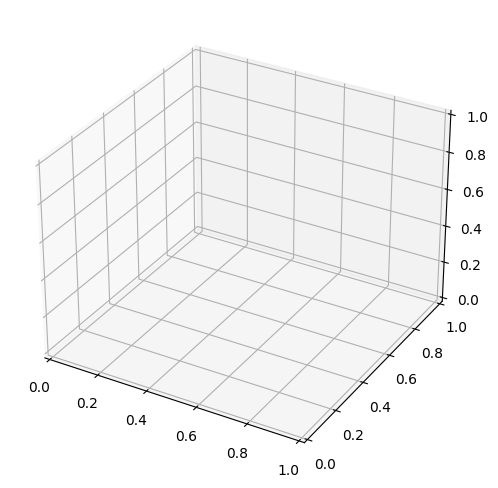

In [ ]:
fig1 = plt.figure(figsize=(9,6))
ax1 = fig1.add_subplot(111, projection='3d')


# Image

In [ ]:
import cv2
img_color = cv2.imread('./Cat.jpeg')
print(img_color.shape)
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
print(img.shape)

(541, 360, 3)
(541, 360)


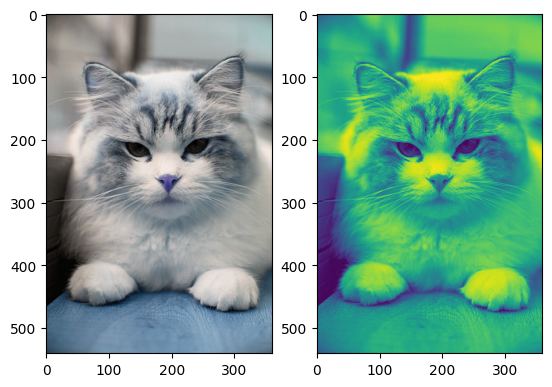

In [ ]:
img = img / 255

ax1 = plt.subplot(1,2,1)
ax1.imshow(img_color)
ax2 = plt.subplot(1,2,2)
ax2.imshow(img)



# SVD

In [ ]:
Sd = img.dot(img.T) #Outer Product representation)
print(Sd.shape)

def PCA(Sd, maximum_lamda, step):
  Id = Identiy_Matrix(Sd)
  eigen_value = []
  i = 0
  while i <= maximum_lamda:
    if np.linalg.det(Sd - ( i* Id)) == 0:
      eigen_value.append(i)
      i = i + step
    else:
      i = i + step

  eigen_value = np.sqrt(eigen_value)
  return eigen_value

eigen_value = sorted(PCA(Sd, 12, 0.01), reverse = True)

print(eigen_value)





(541, 541)


/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


[0.5, 0.4898979485566357, 0.479583152331272, 0.46904157598234303, 0.45825756949558405, 0.447213595499958, 0.4358898943540674, 0.42426406871192857, 0.41231056256176607, 0.4, 0.3872983346207417, 0.3741657386773941, 0.3605551275463989, 0.3464101615137754, 0.33166247903553997, 0.31622776601683794, 0.3, 0.282842712474619, 0.2645751311064591, 0.24494897427831783, 0.22360679774997896, 0.2, 0.17320508075688773, 0.1414213562373095, 0.1, 0.0]


In [ ]:
print(len(eigen_value))


26


In [ ]:
def Eigen_vector(Sd, eigen_value):
  len_of_eigen_value = len(eigen_value)
  rank = Sd.shape[0]
  eigen_vector = np.zeros((len_of_eigen_value, rank, rank))
  for i in range(len(eigen_value)):
    eigen_vector[i][:][:] = ( Sd / ( eigen_value[i] ** 2))
  return eigen_vector

eigen_vector = Eigen_vector(Sd, eigen_value)

print(eigen_vector.shape)


(26, 541, 541)


<ipython-input-174-ff4261c98b0a>:6: RuntimeWarning: divide by zero encountered in true_divide
  eigen_vector[i][:][:] = ( Sd / ( eigen_value[i] ** 2))


In [ ]:
def Restore(number_of_eigen_value, Sd, eigen_vector):
  rank = Sd.shape[0]
  img = np.zeros((rank,rank))
  for i in range(number_of_eigen_value):
    img = img +  eigen_vector[i][:][:].reshape(rank,rank)

  return img

img_restore = Restore(1, Sd , eigen_vector)

print(img_restore.shape)

(541, 541)


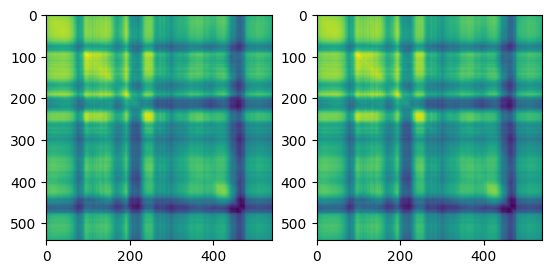

In [ ]:
ax3 = plt.subplot(1,2,1)
ax3.imshow(img_restore)
ax4 = plt.subplot(1,2,2)
ax4.imshow(Sd)